# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
path = '/Users/stephenhelvig/Documents/Python Projects/DataCo Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'dataco_cleaned_3.pkl'))

# Getting Organized: Selecting numberical variables & standardization

In [4]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nNumerical columns:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

Dataset shape: (180519, 65)

Data types:
type                            object
days_for_shipping_real           int64
days_for_shipment_scheduled      int64
benefit_per_order              float64
sales_per_customer             float64
                                ...   
order_day_of_week                int32
order_hour                       int32
order_month_name                object
order_day_name                  object
department_corrected            object
Length: 65, dtype: object

Numerical columns:
['days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order', 'sales_per_customer', 'late_delivery_risk', 'category_id', 'customer_id', 'customer_zipcode', 'department_id', 'latitude_src', 'longitude_src', 'order_customer_id', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total', 'product_card_id', 'product

In [5]:
# Select the numeric and meaningful clustering variables
clustering_vars = [
    'days_for_shipping_real',
    'days_for_shipment_scheduled', 
    'benefit_per_order',
    'sales_per_customer',
    'late_delivery_risk',
    'order_item_discount',
    'order_item_discount_rate',
    'order_item_profit_ratio',
    'order_item_quantity',
    'sales',
    'order_item_total',
    'order_item_product_price',
    'product_price',
    'product_status',
    'shipping_distance_km'
]

# Create clustering dataset
cluster_df = df[clustering_vars].copy()

# Double check for missing values
print("Missing values per column:")
print(cluster_df.isnull().sum())
print(f"\nDataset shape: {cluster_df.shape}")

Missing values per column:
days_for_shipping_real         0
days_for_shipment_scheduled    0
benefit_per_order              0
sales_per_customer             0
late_delivery_risk             0
order_item_discount            0
order_item_discount_rate       0
order_item_profit_ratio        0
order_item_quantity            0
sales                          0
order_item_total               0
order_item_product_price       0
product_price                  0
product_status                 0
shipping_distance_km           0
dtype: int64

Dataset shape: (180519, 15)


In [6]:
# Standardize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

# Convert back to dataframe for easier handling
cluster_scaled_df = pd.DataFrame(cluster_scaled, columns=clustering_vars)

print("Original data sample:")
print(cluster_df.head())
print(f"\nOriginal data ranges:")
print(cluster_df.describe().loc[['min', 'max']])

print(f"\nStandardized data sample:")
print(cluster_scaled_df.head())
print(f"\nStandardized data ranges:")
print(cluster_scaled_df.describe().loc[['min', 'max']])

Original data sample:
   days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   sales_per_customer  late_delivery_risk  order_item_discount  \
0          314.640015                   0            13.110000   
1          311.359985                   1            16.389999   
2          309.720001                   0            18.030001   
3          304.809998                   0            22.940001   
4          298.250000                   0            29.500000   

   order_item_discount_rate  order_item_profit_ratio  order_item_quantity  \
0                      0.04              

# Begin Clustering Analysis

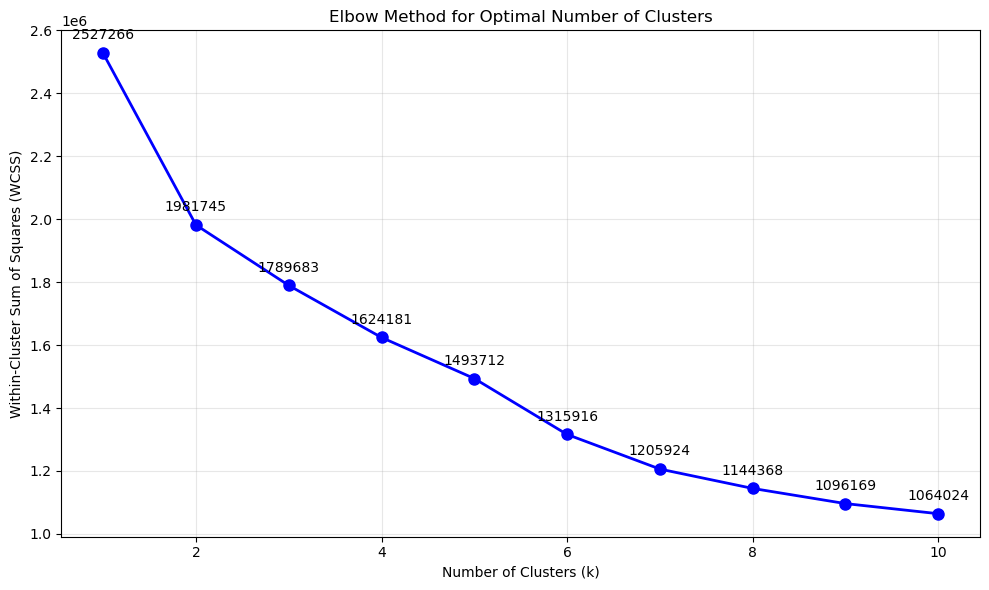

WCSS values by cluster count:
k=1: 2527266
k=2: 1981745
k=3: 1789683
k=4: 1624181
k=5: 1493712
k=6: 1315916
k=7: 1205924
k=8: 1144368
k=9: 1096169
k=10: 1064024


In [7]:
# Elbow Method - calculate WCSS for different numbers of clusters
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)

# Add annotations for each point
for i, (k, score) in enumerate(zip(k_range, wcss)):
    plt.annotate(f'{score:.0f}', (k, score), textcoords="offset points", 
                xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Print WCSS values for analysis
print("WCSS values by cluster count:")
for k, score in zip(k_range, wcss):
    print(f"k={k}: {score:.0f}")

The elbow isn't terrible "sharp," but after 4 clusters the difference between them starts to become less significant. An argument could be made that using 6 clusters may also be a good, but I ran this analysis with 4. 

In [8]:
# Run k-means with 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_scaled)

# Add cluster labels to original dataframe
df['cluster'] = cluster_labels
cluster_df['cluster'] = cluster_labels

print(f"Cluster distribution:")
print(df['cluster'].value_counts().sort_index())
print(f"\nPercentage distribution:")
print(df['cluster'].value_counts(normalize=True).sort_index().round(3))

Cluster distribution:
cluster
0    10713
1    40172
2    33010
3    96624
Name: count, dtype: int64

Percentage distribution:
cluster
0    0.059
1    0.223
2    0.183
3    0.535
Name: proportion, dtype: float64


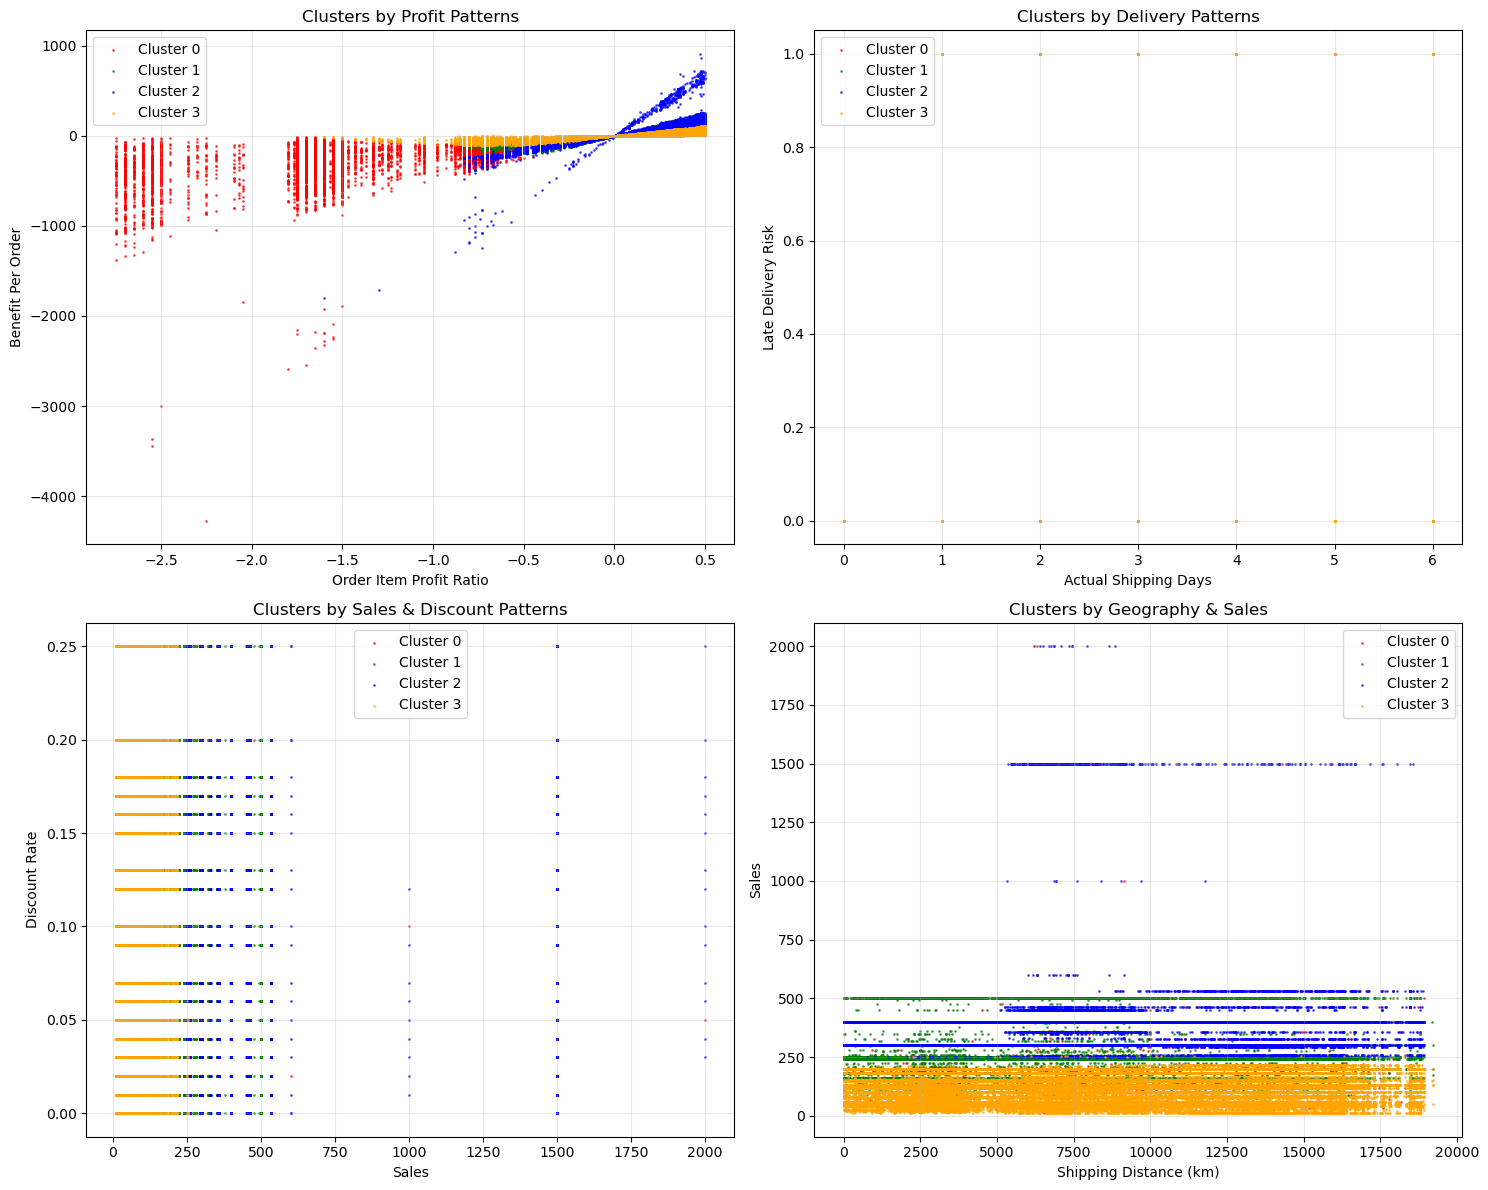

In [9]:
# Define colors for each cluster
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}

# Create visualizations to understand cluster differences
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Profit patterns: Profit ratio vs Benefit per order
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    axes[0,0].scatter(cluster_data['order_item_profit_ratio'], cluster_data['benefit_per_order'], 
                      color=cluster_colors[cluster_id], alpha=0.6, s=1, label=f'Cluster {cluster_id}')
axes[0,0].set_xlabel('Order Item Profit Ratio')
axes[0,0].set_ylabel('Benefit Per Order')
axes[0,0].set_title('Clusters by Profit Patterns')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# 2. Delivery patterns: Shipping days vs Late delivery risk
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    axes[0,1].scatter(cluster_data['days_for_shipping_real'], cluster_data['late_delivery_risk'], 
                      color=cluster_colors[cluster_id], alpha=0.6, s=1, label=f'Cluster {cluster_id}')
axes[0,1].set_xlabel('Actual Shipping Days')
axes[0,1].set_ylabel('Late Delivery Risk')
axes[0,1].set_title('Clusters by Delivery Patterns')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# 3. Sales patterns: Sales vs Discount rate
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    axes[1,0].scatter(cluster_data['sales'], cluster_data['order_item_discount_rate'], 
                      color=cluster_colors[cluster_id], alpha=0.6, s=1, label=f'Cluster {cluster_id}')
axes[1,0].set_xlabel('Sales')
axes[1,0].set_ylabel('Discount Rate')
axes[1,0].set_title('Clusters by Sales & Discount Patterns')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# 4. Geographic patterns: Shipping distance
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    axes[1,1].scatter(cluster_data['shipping_distance_km'], cluster_data['sales'], 
                      color=cluster_colors[cluster_id], alpha=0.6, s=1, label=f'Cluster {cluster_id}')
axes[1,1].set_xlabel('Shipping Distance (km)')
axes[1,1].set_ylabel('Sales')
axes[1,1].set_title('Clusters by Geography & Sales')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.savefig('cluster_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

The clusters seem to be based on business performance. For instance, in the upper left cluster, cluster 0 shows all the negative profit orders in red. The bottom 2 clusters are organized simalarily, where the yellow cluster is always showing sales of 250 or less and the blue custer is showing sales of approximately 250 and above. 

In [10]:
# Calculate descriptive statistics by cluster
cluster_stats = df.groupby('cluster')[clustering_vars].agg(['mean', 'median', 'std']).round(2)

print("=== CLUSTER DESCRIPTIVE STATISTICS ===")
print(f"\nCluster sizes: {df['cluster'].value_counts().sort_index().values}")

# Key business metrics comparison
key_metrics = ['benefit_per_order', 'order_item_profit_ratio', 'order_item_discount_rate', 
               'sales', 'late_delivery_risk', 'shipping_distance_km']

for metric in key_metrics:
    print(f"\n{metric.upper()}:")
    metric_stats = df.groupby('cluster')[metric].agg(['mean', 'median']).round(3)
    print(metric_stats)

=== CLUSTER DESCRIPTIVE STATISTICS ===

Cluster sizes: [10713 40172 33010 96624]

BENEFIT_PER_ORDER:
            mean  median
cluster                 
0       -268.463 -208.27
1         53.805   58.03
2         76.414   88.38
3         22.345   22.14

ORDER_ITEM_PROFIT_RATIO:
          mean  median
cluster               
0       -1.341   -1.50
1        0.233    0.29
2        0.230    0.28
3        0.199    0.28

ORDER_ITEM_DISCOUNT_RATE:
          mean  median
cluster               
0        0.098    0.09
1        0.105    0.10
2        0.102    0.10
3        0.100    0.09

SALES:
            mean  median
cluster                 
0        234.159  199.99
1        255.668  239.96
2        373.859  399.98
3        120.720  129.99

LATE_DELIVERY_RISK:
          mean  median
cluster               
0        0.551     1.0
1        0.546     1.0
2        0.548     1.0
3        0.549     1.0

SHIPPING_DISTANCE_KM:
             mean    median
cluster                    
0        7314.602  6935.

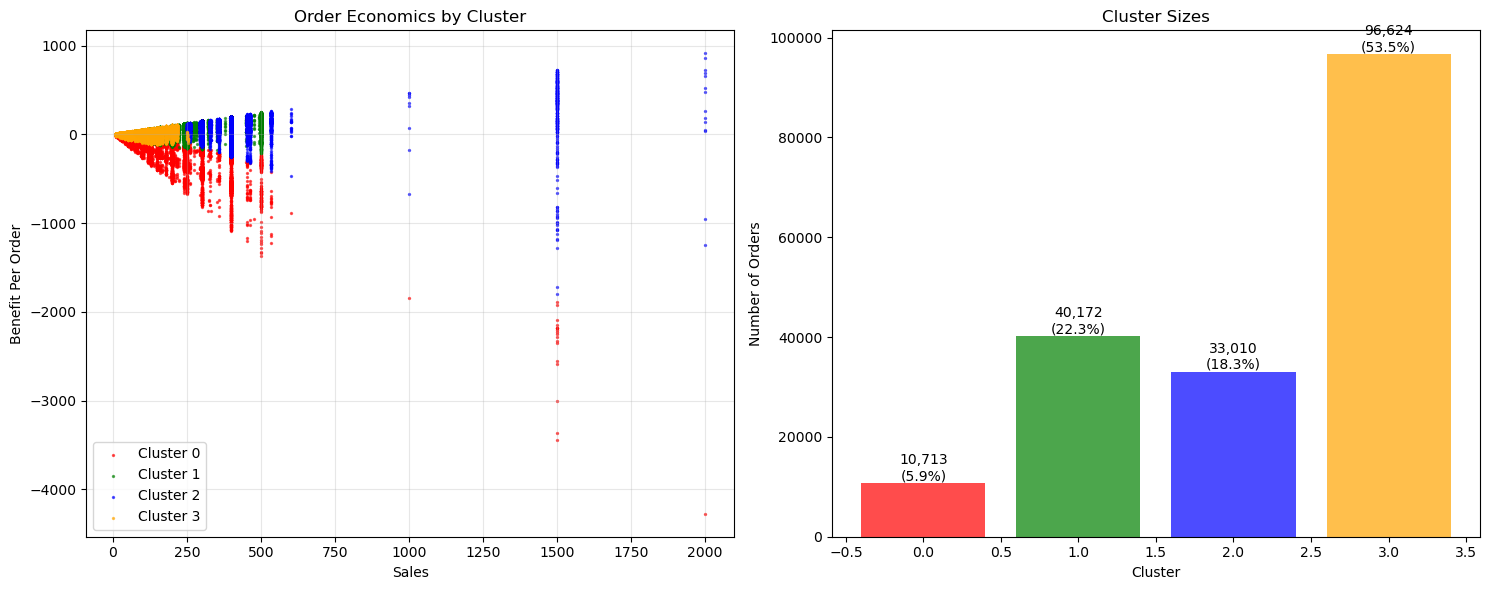

In [11]:
# Define colors for each cluster
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}

# Business-focused cluster comparison with consistent colors
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Benefit vs Sales by cluster
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    axes[0].scatter(cluster_data['sales'], cluster_data['benefit_per_order'], 
                   label=f'Cluster {cluster_id}', alpha=0.6, s=2, 
                   color=cluster_colors[cluster_id])

axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Benefit Per Order')
axes[0].set_title('Order Economics by Cluster')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cluster size and average metrics
cluster_summary = df.groupby('cluster').agg({
    'benefit_per_order': 'mean',
    'sales': 'mean',
    'cluster': 'count'
}).rename(columns={'cluster': 'order_count'})

# Use the same colors for the bar chart
bar_colors = [cluster_colors[i] for i in cluster_summary.index]
bars = axes[1].bar(cluster_summary.index, cluster_summary['order_count'], 
                   color=bar_colors, alpha=0.7)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Cluster Sizes')

# Add labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('cluster_business_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Cluster Analysis Summary

### Do the clusters make sense?
**YES** - These clusters represent distinct **order performance tiers** based on economic outcomes:

- **Cluster 0 (Red)**: Loss-making orders
- **Cluster 1 (Green)**: Profitable standard orders  
- **Cluster 2 (Blue)**: Premium high-value orders
- **Cluster 3 (Orange)**: Volume orders

Red is essentially problem orders, green standard orders, blue is high reward, but also higher risk. Overall blue is profitable, but it starts to see some big negative orders, too. And orange is high volume (makes up most orders), but lower margins overall. The synthetic nature of the data seems to keep these clusters distributed proportionally across discount tiers, shipping distances, and delivery days. 

### Future Analytics Pipeline Applications:
1. **Risk Management**: Flag potential Cluster 0 orders for manual review
2. **Operational Optimization**: Different fulfillment strategies per cluster. (Cluster 2 -> Priority shipping, quality packaging, Cluster 3 -> automated, efficiency-focused fulfillment)

# I want to look deeper into this to see what else I can learn about the reason for these clusters. 

# Cross-tabulation analysis

In [12]:
# Key categorical variables to analyze
categorical_vars = [
    'customer_segment', 
    'market', 
    'shipping_mode',
    'department_corrected',
    'order_region',
    'delivery_status',
    'order_status'
]

# Function to analyze cluster composition
def analyze_cluster_drivers(df, cluster_col, cat_var):
    # Cross-tabulation
    crosstab = pd.crosstab(df[cluster_col], df[cat_var], normalize='index') * 100
    
    print(f"\n=== {cat_var.upper()} BY CLUSTER ===")
    print("(Percentages within each cluster)")
    print(crosstab.round(1))
    
    # Find over/under-represented categories
    overall_dist = df[cat_var].value_counts(normalize=True) * 100
    print(f"\nOverall distribution: {cat_var}")
    print(overall_dist.round(1))
    
    return crosstab

# Analyze each categorical variable
for var in categorical_vars:
    if var in df.columns:
        analyze_cluster_drivers(df, 'cluster', var)
    else:
        print(f"Variable {var} not found in dataset")


=== CUSTOMER_SEGMENT BY CLUSTER ===
(Percentages within each cluster)
customer_segment  Consumer  Corporate  Home Office
cluster                                           
0                     51.6       30.5         18.0
1                     51.7       30.6         17.7
2                     51.8       30.4         17.8
3                     51.9       30.2         17.9

Overall distribution: customer_segment
customer_segment
Consumer       51.8
Corporate      30.4
Home Office    17.9
Name: proportion, dtype: float64

=== MARKET BY CLUSTER ===
(Percentages within each cluster)
market   Africa  Europe  LATAM  Pacific Asia  USCA
cluster                                           
0           6.1    28.2   28.6          23.0  14.1
1           6.7    27.5   30.6          20.1  15.2
2           5.8    30.7   26.0          24.5  13.0
3           6.6    26.9   28.6          23.4  14.4

Overall distribution: market
market
LATAM           28.6
Europe          27.8
Pacific Asia    22.9
USCA  

Ok, so it looks like the only difference I can find among these clusters is in the product departments. There are **no meaningful differences** between customer segments, markets, shipping modes, delivery status, or order regions. 

But there is a big difference in some departments. Cluster 2 dominates in Outdoor Recreation: 86.9%  But Outdoor Recreation is also a meaningful proportion of the problematic cluster 0 at 35%. 

In [13]:
# Analyze Outdoor Recreation performance specifically
outdoor_data = df[df['department_corrected'] == 'Outdoor Recreation']
print("Outdoor Recreation Analysis:")
print(f"Total orders: {len(outdoor_data):,}")
print("\nCluster distribution:")
print(outdoor_data['cluster'].value_counts().sort_index())
print("\nBenefit per order by cluster:")
print(outdoor_data.groupby('cluster')['benefit_per_order'].agg(['mean', 'median', 'std']).round(2))

Outdoor Recreation Analysis:
Total orders: 47,034

Cluster distribution:
cluster
0     3749
1      114
2    28675
3    14496
Name: count, dtype: int64

Benefit per order by cluster:
           mean  median     std
cluster                        
0       -323.77 -271.99  190.72
1         43.26   42.15   63.94
2         73.76   88.19   73.08
3         41.98   50.46   37.15


In [14]:
# Deep dive into what separates profitable vs unprofitable Outdoor Recreation orders
outdoor_data = df[df['department_corrected'] == 'Outdoor Recreation'].copy()

print("=== OUTDOOR RECREATION: PROFIT vs LOSS DRIVERS ===\n")

# Compare key metrics between profitable (Cluster 2) and loss-making (Cluster 0)
profit_outdoor = outdoor_data[outdoor_data['cluster'] == 2]
loss_outdoor = outdoor_data[outdoor_data['cluster'] == 0]

print("KEY DIFFERENCES - Profitable vs Loss-Making Outdoor Recreation:")
comparison_vars = ['sales', 'order_item_discount_rate', 'order_item_profit_ratio', 
                   'order_item_quantity', 'shipping_distance_km', 'days_for_shipping_real']

for var in comparison_vars:
    profit_mean = profit_outdoor[var].mean()
    loss_mean = loss_outdoor[var].mean()
    difference = profit_mean - loss_mean
    print(f"{var}:")
    print(f"  Profitable (Cluster 2): {profit_mean:.2f}")
    print(f"  Loss-making (Cluster 0): {loss_mean:.2f}")
    print(f"  Difference: {difference:.2f}")
    print()

# Check if specific products within Outdoor Recreation drive the difference
print("Top 10 Outdoor Recreation products by volume:")
print(outdoor_data['product_name'].value_counts().head(10))

=== OUTDOOR RECREATION: PROFIT vs LOSS DRIVERS ===

KEY DIFFERENCES - Profitable vs Loss-Making Outdoor Recreation:
sales:
  Profitable (Cluster 2): 356.34
  Loss-making (Cluster 0): 295.76
  Difference: 60.57

order_item_discount_rate:
  Profitable (Cluster 2): 0.10
  Loss-making (Cluster 0): 0.10
  Difference: 0.01

order_item_profit_ratio:
  Profitable (Cluster 2): 0.23
  Loss-making (Cluster 0): -1.20
  Difference: 1.44

order_item_quantity:
  Profitable (Cluster 2): 1.00
  Loss-making (Cluster 0): 1.01
  Difference: -0.01

shipping_distance_km:
  Profitable (Cluster 2): 7104.71
  Loss-making (Cluster 0): 7097.99
  Difference: 6.73

days_for_shipping_real:
  Profitable (Cluster 2): 3.50
  Loss-making (Cluster 0): 3.51
  Difference: -0.02

Top 10 Outdoor Recreation products by volume:
product_name
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
ENO Atlas Hammock Strap

We have nearly identical operations (shipping, discounts, quantities) between clusters, but 1.44 profit ratio difference. It looks like only 3 products make up a bulk of the orders: Field & Stream Gun Safe, Pelican Kayak, and Diamondback Bike. Let's see if those reveal anything.

In [15]:
# Analyze profit performance by specific product
outdoor_product_analysis = outdoor_data.groupby('product_name').agg({
    'cluster': 'first',  # See which cluster each product typically falls into
    'benefit_per_order': ['mean', 'count'],
    'order_item_profit_ratio': 'mean',
    'sales': 'mean'
}).round(2)

# Flatten column names
outdoor_product_analysis.columns = ['typical_cluster', 'avg_benefit', 'order_count', 'avg_profit_ratio', 'avg_sales']

# Sort by order count to see top products
print("=== OUTDOOR RECREATION PRODUCTS BY PERFORMANCE ===")
print(outdoor_product_analysis.sort_values('order_count', ascending=False).head(10))

# Check if the same products appear in different clusters
print("\n=== PRODUCT CLUSTER DISTRIBUTION ===")
for product in ['Field & Stream Sportsman 16 Gun Fire Safe', 
                'Pelican Sunstream 100 Kayak',
                'Diamondback Women\'s Serene Classic Comfort Bi']:
    if product in outdoor_data['product_name'].values:
        product_clusters = outdoor_data[outdoor_data['product_name'] == product]['cluster'].value_counts().sort_index()
        print(f"\n{product}:")
        print(product_clusters)
        
        # Show profit performance by cluster for this product
        product_profit = outdoor_data[outdoor_data['product_name'] == product].groupby('cluster')['benefit_per_order'].agg(['mean', 'count'])
        print("Benefit per order by cluster:")
        print(product_profit.round(2))

=== OUTDOOR RECREATION PRODUCTS BY PERFORMANCE ===
                                               typical_cluster  avg_benefit  \
product_name                                                                  
Field & Stream Sportsman 16 Gun Fire Safe                    2        43.65   
Pelican Sunstream 100 Kayak                                  3        20.91   
Diamondback Women's Serene Classic Comfort Bi                2        31.14   
ENO Atlas Hammock Straps                                     1         6.62   
insta-bed Neverflat Air Mattress                             3        17.28   
The North Face Women's Recon Backpack                        1        49.19   
Pelican Maverick 100X Kayak                                  2        26.76   

                                               order_count  avg_profit_ratio  \
product_name                                                                   
Field & Stream Sportsman 16 Gun Fire Safe            17325              0.12 

There seems to be pretty big profit swings without any explanation. Just another facet of the synthetic nature of the data. 

# Export For Tableau Analysis

In [17]:
print("=== EXPORTING DATA FOR TABLEAU DASHBOARD ===\n")

# 1. Main dataset with cluster assignments
tableau_main = df[[ 
    'order_id', 'order_date_dateorders', 'customer_country', 'order_country_en',
    'department_corrected', 'customer_segment', 'shipping_mode', 'category_name',
    'sales', 'benefit_per_order', 'late_delivery_risk', 'delivery_status',
    'days_for_shipping_real', 'days_for_shipment_scheduled',
    'order_item_profit_ratio', 'order_item_discount_rate',
    'latitude_dest', 'longitude_dest', 'shipping_distance_km', 'cluster'
]].copy()

tableau_main.to_csv('dataco_main_clustered.csv', index=False)
print(f"✅ Main clustered dataset: {len(tableau_main):,} rows, {len(tableau_main.columns)} columns")

# 2. Country-level aggregations for choropleth maps
country_stats = df.groupby('order_country_en').agg({
    'order_id': 'count',
    'sales': ['sum', 'mean'],
    'benefit_per_order': 'mean', 
    'late_delivery_risk': 'mean',
    'days_for_shipping_real': 'mean',
    'shipping_distance_km': 'mean'
}).round(2)

country_stats.columns = ['total_orders', 'total_sales', 'avg_sales', 
                        'avg_benefit', 'late_delivery_rate', 'avg_shipping_days', 'avg_distance']
country_stats.reset_index().to_csv('dataco_country_stats.csv', index=False)
print(f"✅ Country stats with English names: {len(country_stats)} countries")

# 3. Daily time series aggregations  
daily_stats = df.groupby('order_date_dateorders').agg({
    'order_id': 'count',
    'sales': 'sum',
    'benefit_per_order': 'mean', 
    'late_delivery_risk': 'mean'
}).round(2)

daily_stats.columns = ['daily_orders', 'daily_sales', 'daily_avg_benefit', 'daily_late_rate']
daily_stats.reset_index().to_csv('dataco_daily_timeseries.csv', index=False)
print(f"✅ Time series: {len(daily_stats)} days")

# 4. Cluster summary statistics
cluster_summary = df.groupby('cluster').agg({
    'order_id': 'count',
    'sales': 'mean',
    'benefit_per_order': 'mean',
    'late_delivery_risk': 'mean',
    'days_for_shipping_real': 'mean',
    'order_item_profit_ratio': 'mean',
    'shipping_distance_km': 'mean'
}).round(2)

cluster_summary.columns = ['cluster_size', 'avg_sales', 'avg_benefit', 
                          'late_rate', 'avg_shipping_days', 'avg_profit_ratio', 'avg_distance']
cluster_summary = cluster_summary.reset_index()

# Add descriptive labels based on actual analysis results
cluster_summary['cluster_description'] = [
    'Cluster 0: Problem Orders',
    'Cluster 1: Standard Profitable Orders', 
    'Cluster 2: Premium, High Value Orders',
    'Cluster 3: High-Volume, Low Value Orders'
]

cluster_summary.to_csv('dataco_cluster_summary.csv', index=False)
print(f"✅ Cluster summary: {len(cluster_summary)} clusters")

# 5. Department performance for business context
dept_stats = df.groupby('department_corrected').agg({
    'order_id': 'count',
    'benefit_per_order': 'mean',
    'late_delivery_risk': 'mean'
}).round(2)

dept_stats.columns = ['total_orders', 'avg_benefit', 'late_rate']
dept_stats.reset_index().to_csv('dataco_department_stats.csv', index=False)
print(f"✅ Department stats: {len(dept_stats)} departments")

print(f"\n🎯 All 5 Tableau files exported successfully!")
print("Files created:")
print("- dataco_main_clustered.csv (main dataset)")
print("- dataco_country_stats.csv (geographic analysis)")
print("- dataco_daily_timeseries.csv (time series)")
print("- dataco_cluster_summary.csv (cluster comparison)")  
print("- dataco_department_stats.csv (business context)")

=== EXPORTING DATA FOR TABLEAU DASHBOARD ===

✅ Main clustered dataset: 180,519 rows, 20 columns
✅ Country stats with English names: 164 countries
✅ Time series: 65752 days
✅ Cluster summary: 4 clusters
✅ Department stats: 15 departments

🎯 All 5 Tableau files exported successfully!
Files created:
- dataco_main_clustered.csv (main dataset)
- dataco_country_stats.csv (geographic analysis)
- dataco_daily_timeseries.csv (time series)
- dataco_cluster_summary.csv (cluster comparison)
- dataco_department_stats.csv (business context)
